# Jobs Analysis

In [2]:
#IMPORTING NECCESSARY LIBRARIES REQUIRED FOR ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read dataframe
df = pd.read_csv('Software_Professional_Salaries.csv')

In [4]:
df.head(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
df.shape

(22770, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [8]:
df.describe(include='object')

,Company Name,Job Title,Location,Employment Status,Job Roles
count,22770,22770,22770,22770,22770
unique,11261,1080,10,4,11
top,Tata Consultancy Services,Software Development Engineer,Bangalore,Full Time,SDE
freq,271,2351,8264,20083,8183


In [9]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [14]:
df['Job Title'].unique()

array(['Android Developer', 'Android Developer - Intern',
       'Android Developer - Contractor', ..., 'Web Developer Contractor',
       'Full Stack Web Developer', 'Associate Web Developer'],
      dtype=object)

In [15]:
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [17]:
#Finding out the null values and Filling those values.
df.isna().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

### Since the data has cleaned now we can perform Analysis based on data.

## Univariate analysis
explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

In [20]:
df['Rating'].value_counts()

4.00    2895
3.90    2473
3.80    2471
4.10    2111
3.70    1479
4.20    1323
4.30    1294
3.60    1009
4.40     883
4.50     861
3.50     801
3.30     727
5.00     672
3.40     574
4.60     464
4.70     401
3.00     333
3.10     329
3.20     316
4.80     283
2.90     177
4.90     157
2.80     129
2.70      98
2.60      77
1.00      67
2.50      66
2.00      54
2.40      53
2.30      43
2.20      43
3.95      27
2.10      15
1.90      15
1.80      12
3.85      11
1.50       8
1.60       8
1.40       5
1.70       4
1.30       2
Name: Rating, dtype: int64

In [22]:
def handlerating(value):
    value = round(value,1)
    return value
df['Rating'] = df['Rating'].apply(handlerating)

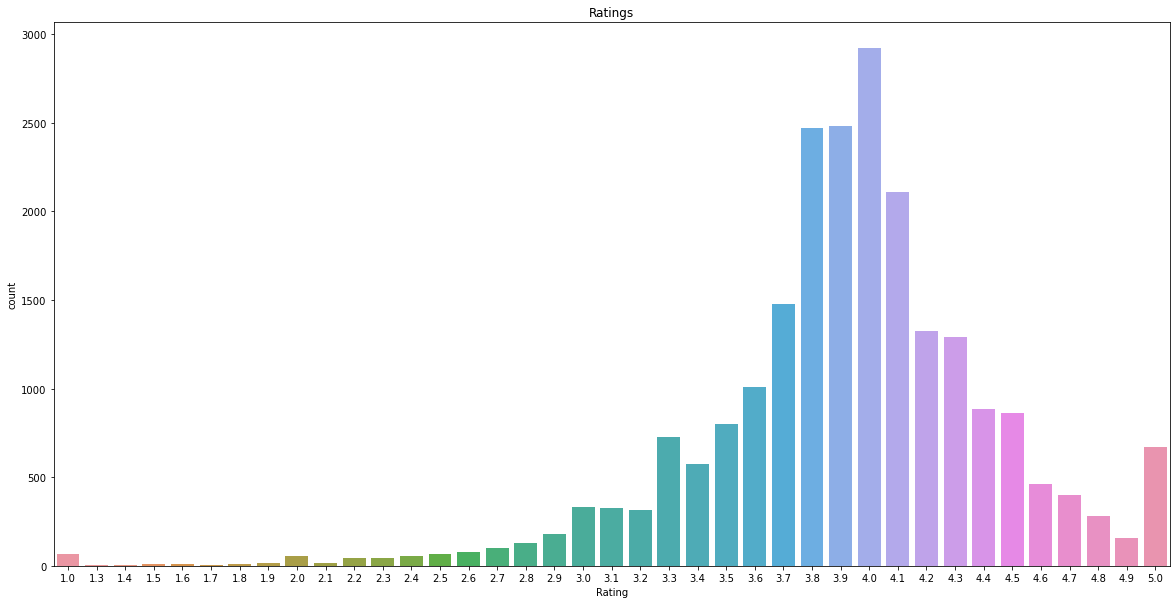

In [25]:
#Data Visualization
plt.figure(figsize=(20, 10))
plt.title('Ratings')
sns.countplot(df['Rating']);

### Top 10 company has maximum number of employees

In [30]:
top10 = df['Company Name'].value_counts()[:10]
top10

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
Wipro                             122
IBM                               122
HCL Technologies                  102
Capgemini                         101
Fresher                           101
Name: Company Name, dtype: int64

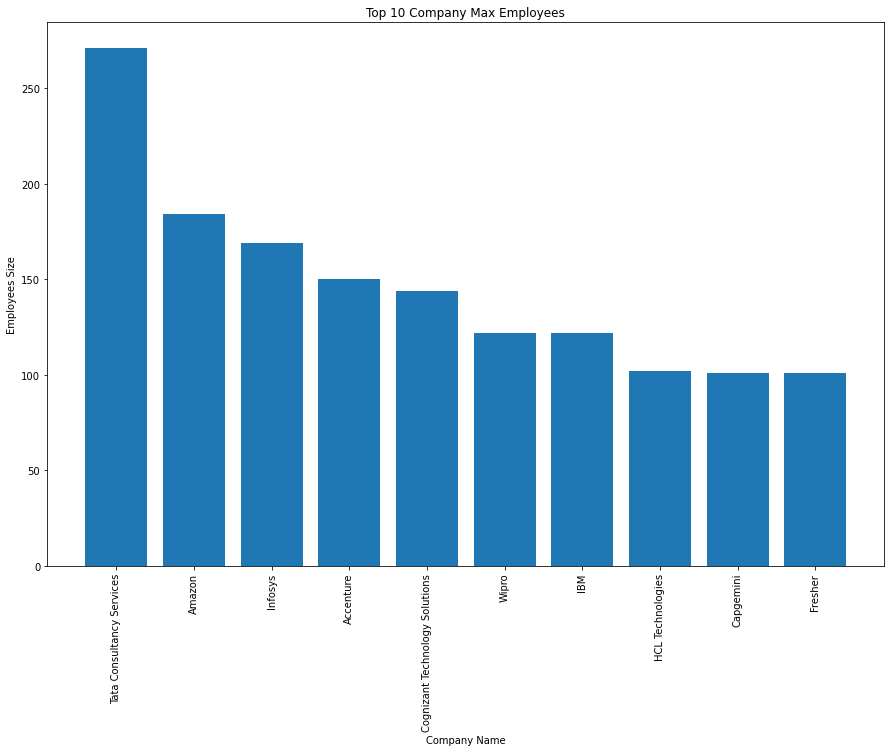

In [35]:
#Data Visualization
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Top 10 Company Max Employees')
plt.xlabel('Company Name')
plt.ylabel('Employees Size')
plt.bar(top10.keys(), top10);

### Top 20 Jobs

In [37]:
top20_jobs = df['Job Title'].value_counts()[:20]
top20_jobs

Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
IOS Developer                                    484
Java Developer                                   387
Senior IOS Developer                             351
Senior Software Development Engineer             350
Junior Java Developer                            330
Senior Java Developer                            318
Software Development Engineer I                  312
Software Development Engineer (SDE) - Intern     297
Senior Android Developer                      

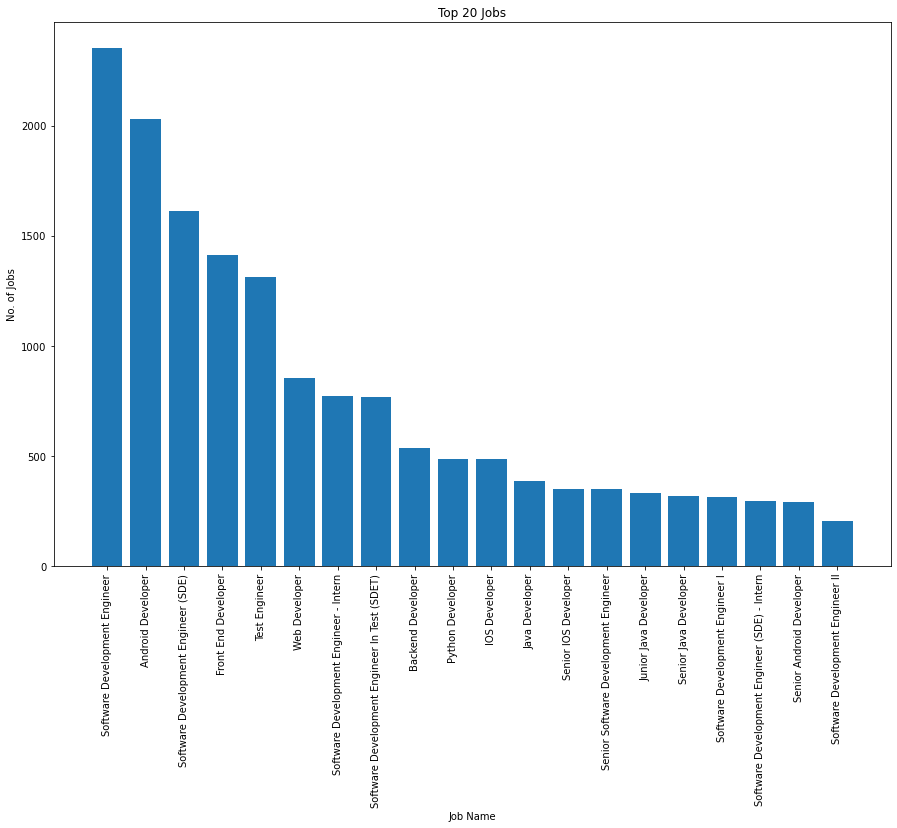

In [38]:
#Data visualisation
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Top 20 Jobs')
plt.xlabel('Job Name')
plt.ylabel('No. of Jobs')
plt.bar(top20_jobs.keys(), top20_jobs);

### Employment Status

In [39]:
emp_status = df['Employment Status'].value_counts()
emp_status

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

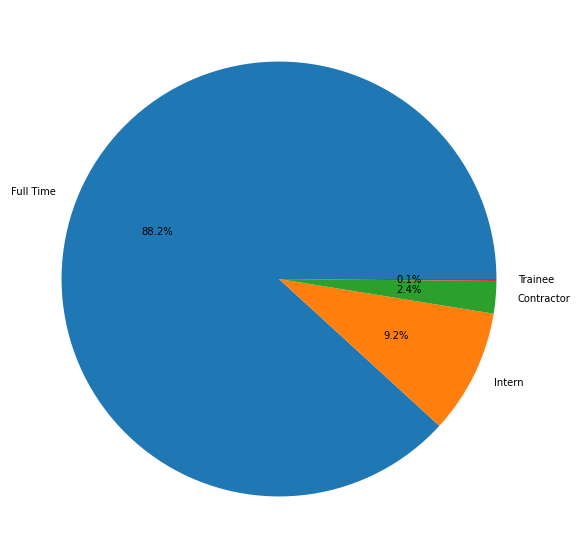

In [49]:
plt.figure(figsize=(15, 10))
plt.pie(emp_status, labels=emp_status.keys(), autopct='%.1f%%');


In [51]:
#Job Roles
df['Job Roles'].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

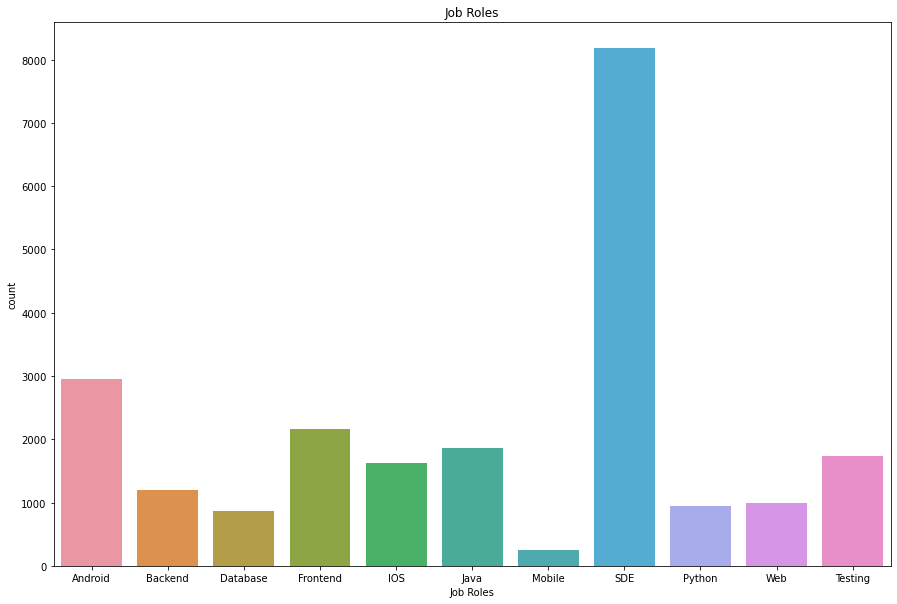

In [52]:
plt.figure(figsize=(15, 10))
plt.title('Job Roles')
sns.countplot('Job Roles', data=df);

## Bivariate analysis 
stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

### Average Salary Distribution for Job Roles

In [54]:
#The mean() function calculates the average salary.
round(df.groupby('Job Roles')['Salary'].mean(),0)

Job Roles
Android     565911.0
Backend     748518.0
Database    958584.0
Frontend    610099.0
IOS         695254.0
Java        564710.0
Mobile      882283.0
Python      486023.0
SDE         853795.0
Testing     496298.0
Web         415452.0
Name: Salary, dtype: float64

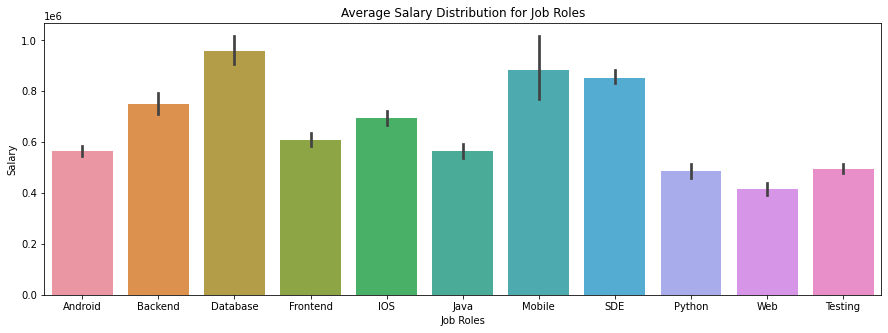

In [56]:
plt.figure(figsize=(15, 5))
plt.title('Average Salary Distribution for Job Roles')
sns.barplot(x='Job Roles', y='Salary', data= df);

In [62]:
df.groupby('Job Roles')['Employment Status'].value_counts()

Job Roles  Employment Status
Android    Full Time            2669
           Intern                225
           Contractor             42
           Trainee                 9
Backend    Full Time             993
           Intern                193
           Contractor              8
Database   Full Time             803
           Contractor             56
           Intern                  6
Frontend   Full Time            1938
           Intern                192
           Contractor             33
IOS        Full Time            1561
           Intern                 47
           Contractor             22
           Trainee                 1
Java       Full Time            1740
           Contractor             60
           Intern                 51
           Trainee                 7
Mobile     Full Time             229
           Intern                 11
           Contractor              4
           Trainee                 1
Python     Full Time             845
         

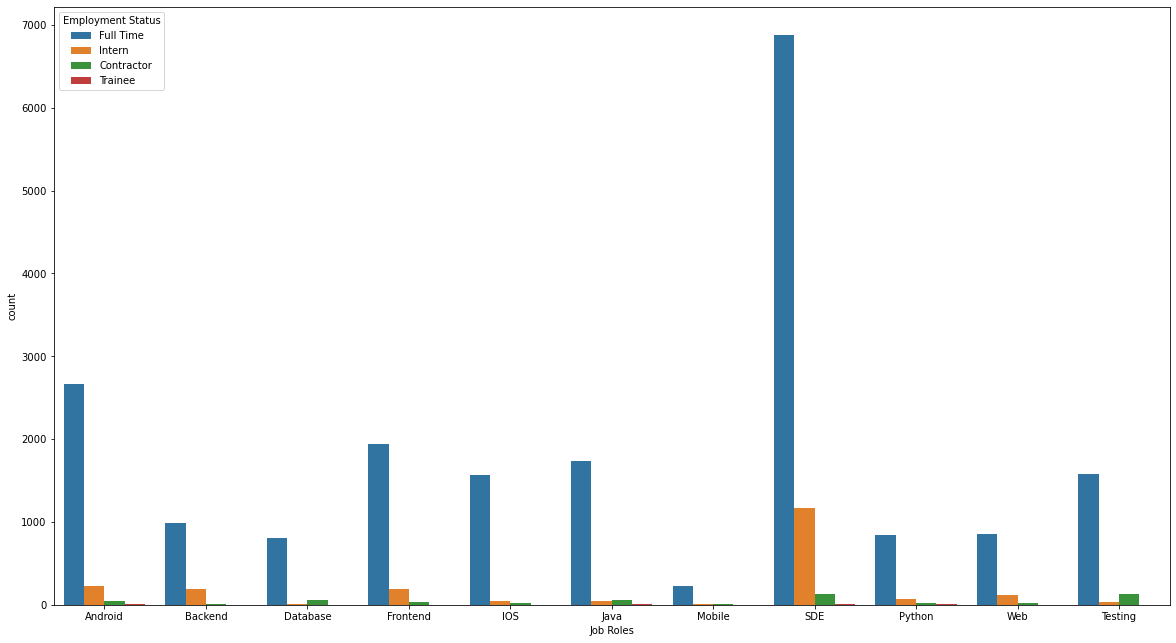

In [61]:
plt.figure(figsize=(20,11))
sns.countplot('Job Roles',hue='Employment Status',data=df);

**From the above graph, Peoples are more interested in getting Full time job as compared to intern , contrater and trainee.**

## Multivariate Analysis
defined as a process of involving multiple dependent variables resulting in one outcome.

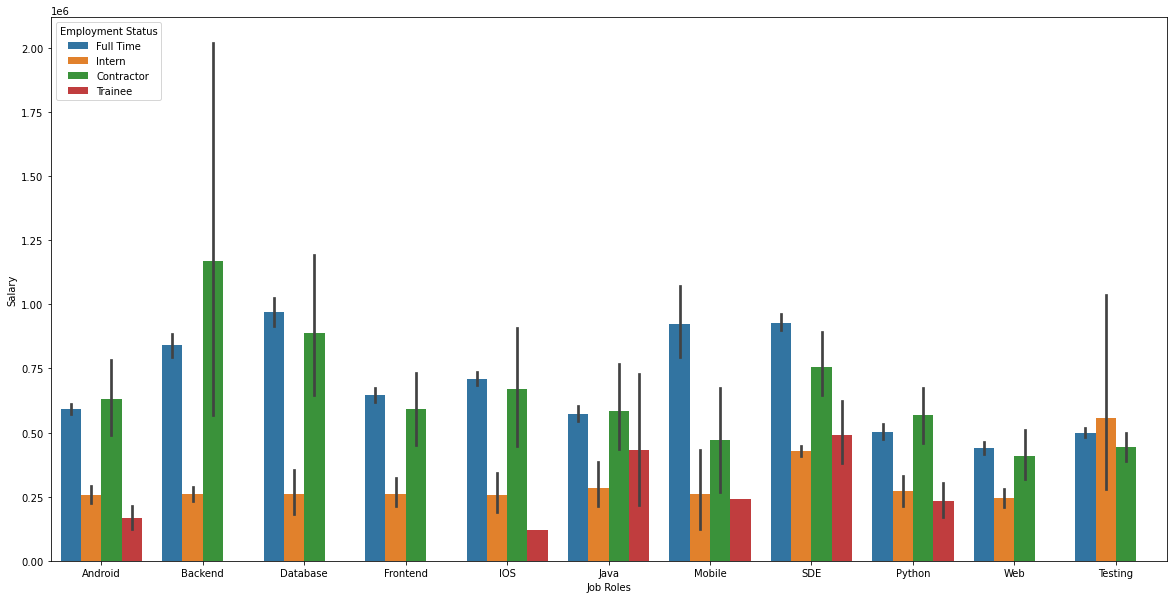

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(x='Job Roles', y='Salary', hue='Employment Status', data=df);

### Top 40 Company Highest Paying Salary

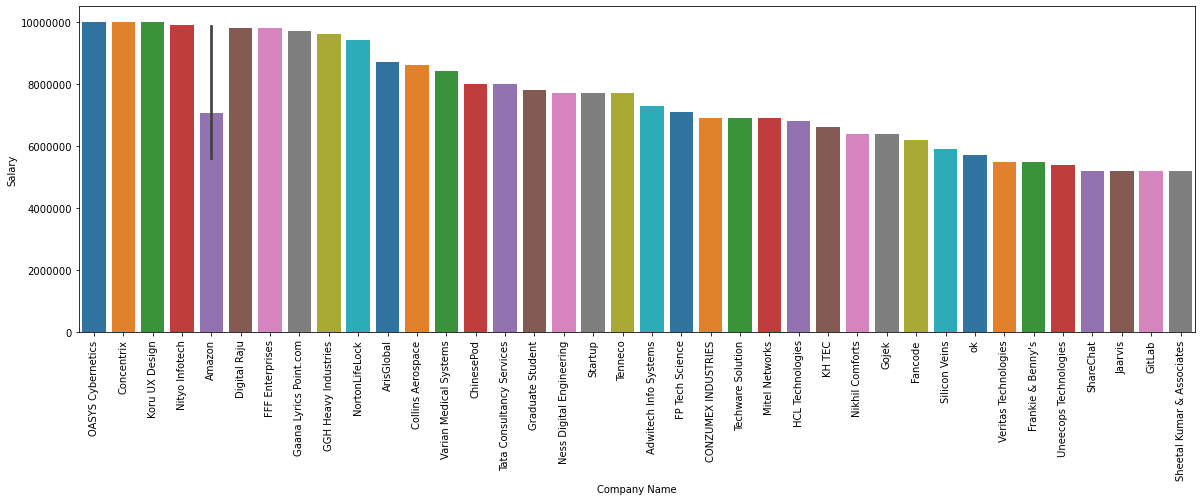

In [70]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
df.sort_values("Salary", axis = 0, ascending= False, inplace= True)
sns.barplot(x= df['Company Name'][1:41], y = df['Salary'][1:41], palette= "tab10");

### Top 20 Companies with 5.0 Rating

In [73]:
df[['Company Name','Rating']].sort_values(by='Rating', ascending= False).head(20)

,Company Name,Rating
7313,OmegaOn,5.0
6818,Web Mingo It Solutions,5.0
10137,Ramcides,5.0
20163,Zlapch TechStudios,5.0
705,Mindzolo Soft Solution,5.0
22489,BizInventive,5.0
7302,Entappia,5.0
9882,HOJ Global Solution,5.0
5971,Mediwave Digital,5.0
21911,Holagraph,5.0


## Top 10 Highest Salary Jobs

In [74]:
df.nlargest(10,['Salary'])

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE
9260,3.6,OASYS Cybernetics,Senior Java Developer,10000000,1,Chennai,Full Time,Java
4471,3.8,Concentrix,Oracle Database Administrator,10000000,1,Bangalore,Full Time,Database
7121,3.5,Koru UX Design,Senior Front End Developer,10000000,1,Pune,Full Time,Frontend
5819,3.7,Nityo Infotech,"Lead UI Designer, Magento Front-end Developer",9900000,1,Bangalore,Full Time,Frontend
16062,3.8,Amazon,Software Development Engineer (SDE),9850000,1,Kolkata,Full Time,SDE
18654,4.3,Digital Raju,Software Development Engineer (SDE),9800000,1,New Delhi,Full Time,SDE
16619,4.2,FFF Enterprises,Non Software Development Engineer,9800000,1,Mumbai,Full Time,SDE
15568,5.0,Gaana Lyrics Point.com,Software Development Engineer (SDE) II,9700000,1,Hyderabad,Full Time,SDE
10832,4.6,GGH Heavy Industries,Best Buy Mobile Sales Associate,9600000,1,Bangalore,Full Time,Mobile


## Top 10 Lowest Salary Jobs

In [75]:
df.nsmallest(10,['Salary'])

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22563,2.6,Keeves Technologies,Web Developer - Intern,2112,1,Bangalore,Intern,Web
9937,3.7,Virtusa,Junior Java Developer,8448,5,Hyderabad,Full Time,Java
5463,4.1,Scholify,Front End Developer - Intern,12000,1,Bangalore,Intern,Frontend
14659,4.4,Microsoft,Software Development Engineer,12000,1,Hyderabad,Full Time,SDE
5548,4.0,Nasya Software Technologies,Front End Developer - Intern,12000,1,Bangalore,Intern,Frontend
7514,3.9,Al-Jazirah,Senior IOS Developer,12000,1,Bangalore,Full Time,IOS
22028,3.9,Yes Bank,Web Developer,12000,1,Bangalore,Full Time,Web
2472,3.5,Acmatics Technologies,Android Developer,12000,1,New Delhi,Full Time,Android
18429,4.0,....,Software Development Engineer (SDE),12000,1,New Delhi,Full Time,SDE
16838,4.4,Excel Engineering Services,Senior Software Development Engineer,12000,1,Mumbai,Full Time,SDE
